## Consolidação dos experimentos

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [27]:
ROOT_DIR = os.path.abspath('.')
MODELS_DIR = os.path.join(ROOT_DIR, 'models')
CUSTOM_MODEL = os.path.join(MODELS_DIR, 'experiments', 'dynamic_range_quantization.tflite')
# IMAGE_DIR =  os.path.join(ROOT_DIR, 'custom_dataset')
IMAGE_DIR =  os.path.join(ROOT_DIR, 'test')


### Carregar arquivos

In [28]:
df_py = pd.read_csv(os.path.join(ROOT_DIR, 'experiments.csv'))
df_py['language'] = 'py'
df_py.head()

,file,modelo,time,score,model_size,language
0,KJD-0885.jpg,original,0.232664,0.792455,11497428,py
1,LBS-2737.jpg,original,0.210868,0.830200,11497428,py
2,IMG_0387.jpg,original,0.210606,0.831097,11497428,py
3,CYU-8900.jpg,original,0.210240,0.799787,11497428,py
4,JID-9361.jpg,original,0.209584,0.799481,11497428,py


In [31]:
df_cc = pd.read_csv(os.path.join(ROOT_DIR, 'experiments_cc.csv'))
df_cc = df_cc.loc[df_cc['modelo'] != 'full_int8']
df_cc['language'] = 'cc'
df_cc['time'] = df_cc['time']/1000
df_cc.head()

,file,modelo,time,score,language
0,Cars424.png,original,0.240,0.557576,cc
1,KJD-0885.jpg,original,0.213,0.815457,cc
2,Cars426.png,original,0.213,0.724777,cc
3,Cars414.png,original,0.213,0.078145,cc
4,Cars427.png,original,0.212,0.068553,cc


Tipos de modelos quantizados

In [32]:
print(df_py['modelo'].unique())
print(df_cc['modelo'].unique())

['original' 'integer_only' 'dynamic' 'full_integer' 'float16']
['original' 'integer_only' 'dynamic' 'full_integer' 'float16']


### Tamanho dos modelos quantizados

In [10]:
import glob
ROOT_DIR = os.path.abspath('.')
MODELS_DIR = os.path.join(ROOT_DIR, 'models')
models = glob.glob(os.path.join(MODELS_DIR, 'experiments', '*.tflite'))

In [33]:
import os

size_model = {}

for model in models:
    name = model.split('/')[-1].split('.')[0]
    size_model[name] = round(os.path.getsize(model)/1000000, 2)

size_model

{'integer_only': 3.74,
 'float16': 5.83,
 'full_integer': 3.74,
 'original': 11.5,
 'dynamic': 3.18}

In [34]:
df_py['size'] = df_py['modelo'].map(size_model)
df_py['perc_size'] = round(df_py['size'] / df_py['size'].max(),3) * 100


df_cc['size'] = df_cc['modelo'].map(size_model)
df_cc['perc_size'] = round(df_cc['size'] / df_cc['size'].max(),3) * 100

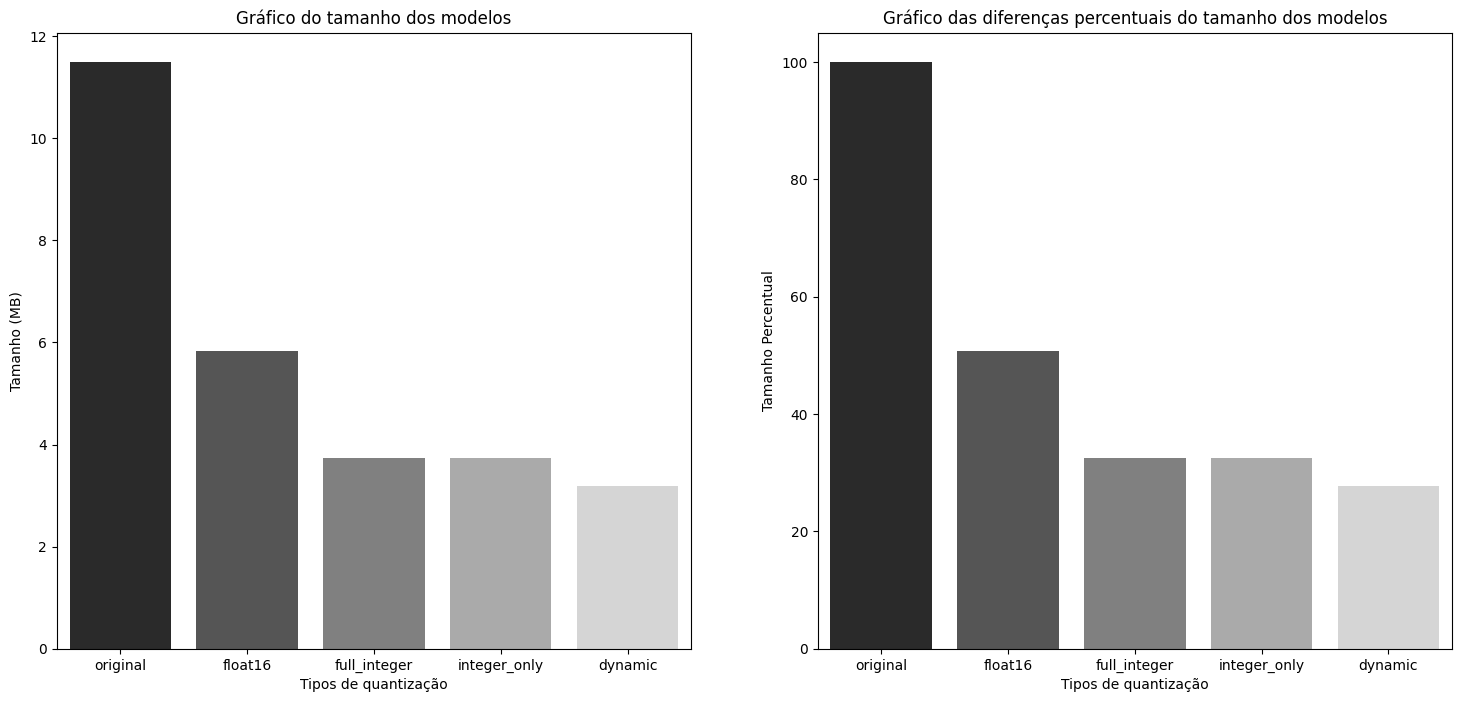

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

g1 = sns.barplot(data=df_cc.sort_values(by=['size'], ascending=False), x='modelo', y='size', palette='binary_r', ax=ax[0])
g1.set_xlabel('Tipos de quantização')
g1.set_ylabel('Tamanho (MB)')
g1.set_title('Gráfico do tamanho dos modelos')

# Plot 2
g2 = sns.barplot(data=df_cc.sort_values(by=['perc_size'], ascending=False), x='modelo', y='perc_size', palette='binary_r', ax=ax[1])
g2.set_xlabel('Tipos de quantização')
g2.set_ylabel('Tamanho Percentual')
g2.set_title('Gráfico das diferenças percentuais do tamanho dos modelos');

fig.savefig(fname='figuras/diff_size.png', dpi=300)

### Tempo de inferencia Python

In [62]:
df_py.groupby(['modelo'], as_index=False).agg({'time':'mean'}).sort_values(by=['time'], ascending=False)

,modelo,time
0,dynamic,0.229566
4,original,0.210925
1,float16,0.209948
2,full_integer,0.166281
3,integer_only,0.165417


In [36]:
df_time = round(1 - (df_py.groupby(['modelo']).agg({'time':'mean'}) / df_py.groupby(['modelo']).agg({'time':'mean'}).max()), 3) * 100
df_time = df_time.reset_index()

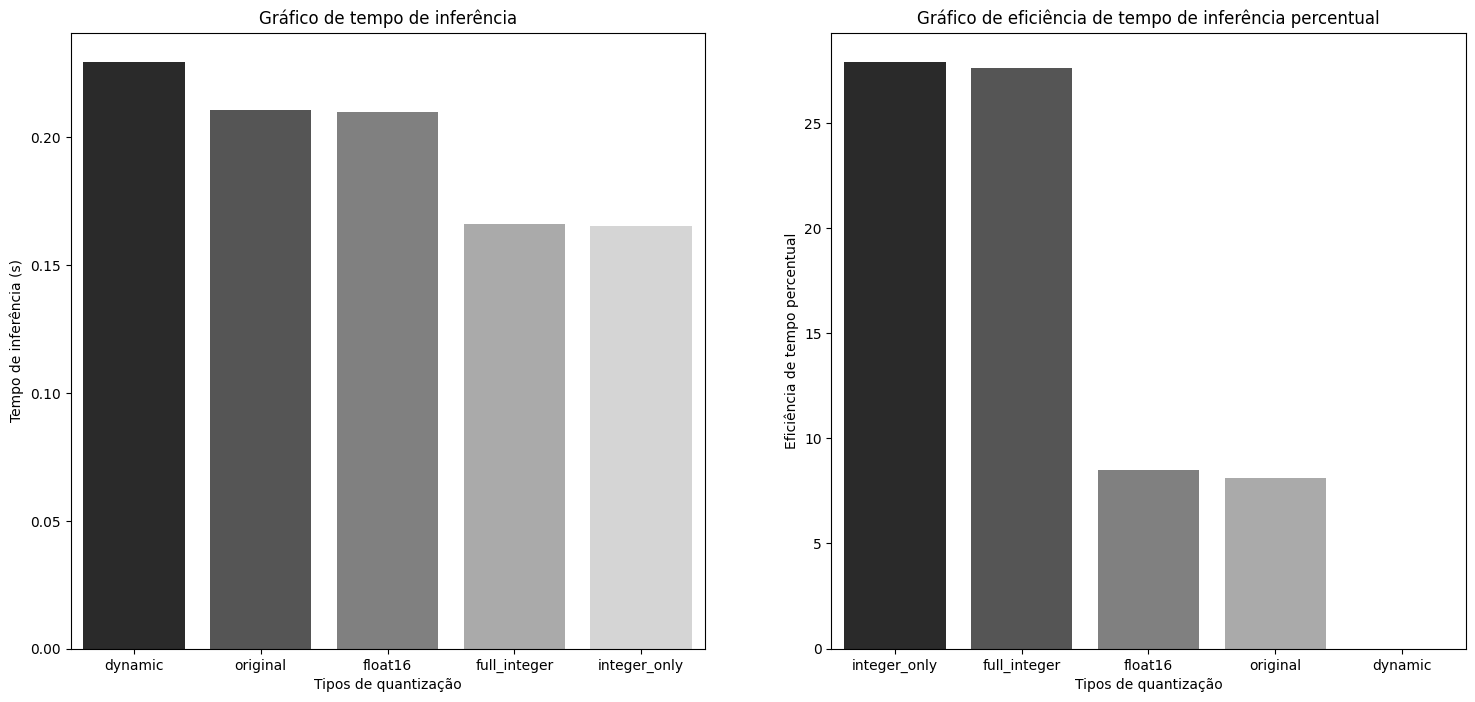

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

g1 = sns.barplot(data=df_py.groupby(['modelo'], as_index=False).agg({'time':'mean'}).sort_values(by=['time'], ascending=False), x='modelo', y='time', palette='binary_r', ax=ax[0])
g1.set_xlabel('Tipos de quantização')
g1.set_ylabel('Tempo de inferência (s)')
g1.set_title('Gráfico de tempo de inferência')

# Plot 2
g2 = sns.barplot(data=df_time.sort_values(by=['time'], ascending=False), x='modelo', y='time', palette='binary_r', ax=ax[1])
g2.set_xlabel('Tipos de quantização')
g2.set_ylabel('Eficiência de tempo percentual')
g2.set_title('Gráfico de eficiência de tempo de inferência percentual')

fig.savefig(fname='figuras/diff_time.png', dpi=300);

### Tempo de inferencia C++

In [63]:
df_cc.groupby(['modelo'], as_index=False).agg({'time':'mean'}).sort_values(by=['time'], ascending=False)

,modelo,time
1,float16,0.21516
4,original,0.21370
0,dynamic,0.16764
3,integer_only,0.07094
2,full_integer,0.07016


In [38]:
df_time_cc = round(1 - (df_cc.groupby(['modelo']).agg({'time':'mean'}) / df_cc.groupby(['modelo']).agg({'time':'mean'}).max()), 3) * 100
df_time_cc = df_time_cc.reset_index()
df_time_cc

,modelo,time
0,dynamic,22.1
1,float16,0.0
2,full_integer,67.4
3,integer_only,67.0
4,original,0.7


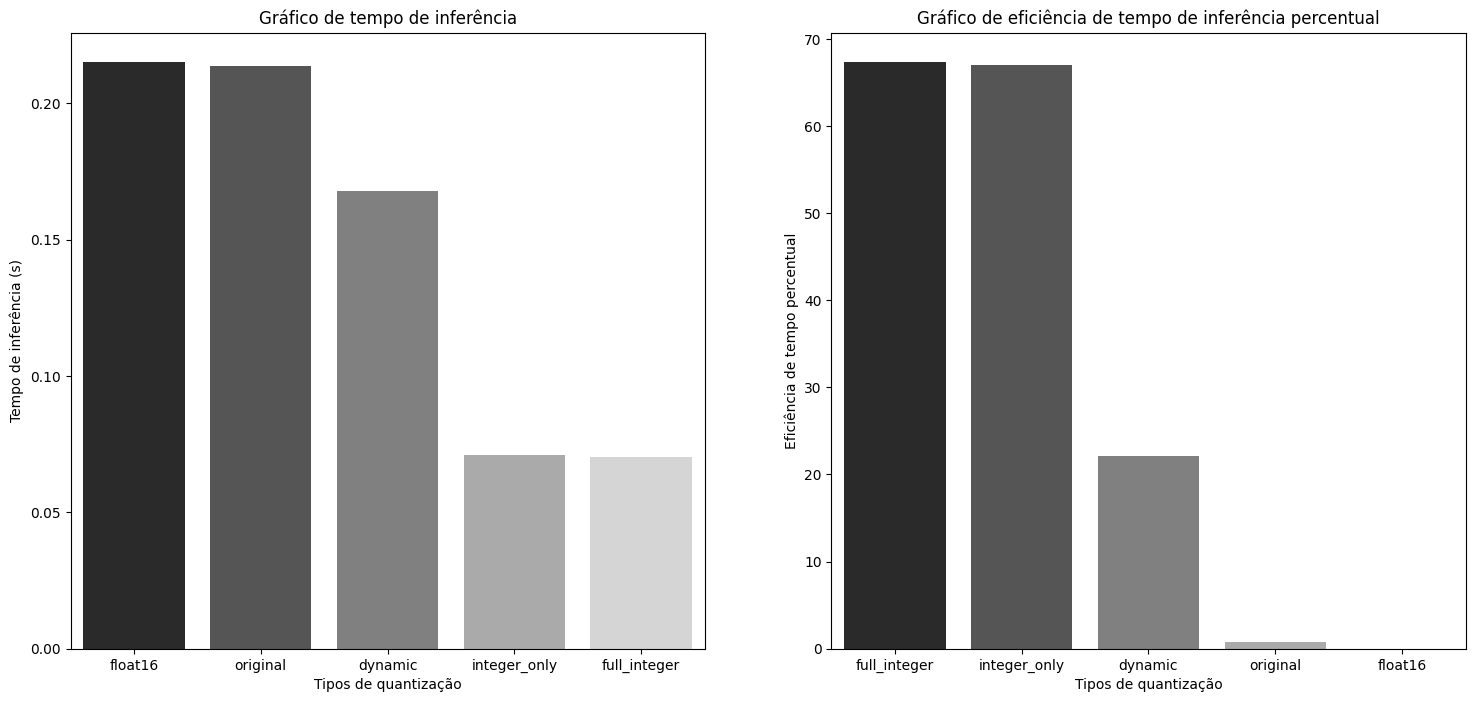

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

g1 = sns.barplot(data=df_cc.groupby(['modelo'], as_index=False).agg({'time':'mean'}).sort_values(by=['time'], ascending=False), x='modelo', y='time', palette='binary_r', ax=ax[0])
g1.set_xlabel('Tipos de quantização')
g1.set_ylabel('Tempo de inferência (s)')
g1.set_title('Gráfico de tempo de inferência')

# Plot 2
g2 = sns.barplot(data=df_time_cc.sort_values(by=['time'], ascending=False), x='modelo', y='time', palette='binary_r', ax=ax[1])
g2.set_xlabel('Tipos de quantização')
g2.set_ylabel('Eficiência de tempo percentual')
g2.set_title('Gráfico de eficiência de tempo de inferência percentual')

fig.savefig(fname='figuras/diff_time_cc.png', dpi=300);

### Comparar eficiência

In [40]:
df_all = pd.concat([df_py.loc[df_py['modelo'] != 'full_int8'], df_cc], ignore_index=True)

In [41]:
df_all

,file,modelo,time,score,model_size,language,size,perc_size
0,KJD-0885.jpg,original,0.232664,0.792455,11497428.0,py,11.50,100.0
1,LBS-2737.jpg,original,0.210868,0.830200,11497428.0,py,11.50,100.0
2,IMG_0387.jpg,original,0.210606,0.831097,11497428.0,py,11.50,100.0
3,CYU-8900.jpg,original,0.210240,0.799787,11497428.0,py,11.50,100.0
4,JID-9361.jpg,original,0.209584,0.799481,11497428.0,py,11.50,100.0
...,...,...,...,...,...,...,...,...
495,KZD-5187.jpg,float16,0.215000,0.829752,NaN,cc,5.83,50.7
496,IMG_0467.jpg,float16,0.214000,0.712107,NaN,cc,5.83,50.7
497,IMG_0470.jpg,float16,0.219000,0.842269,NaN,cc,5.83,50.7
498,Cars406.png,float16,0.214000,0.884496,NaN,cc,5.83,50.7


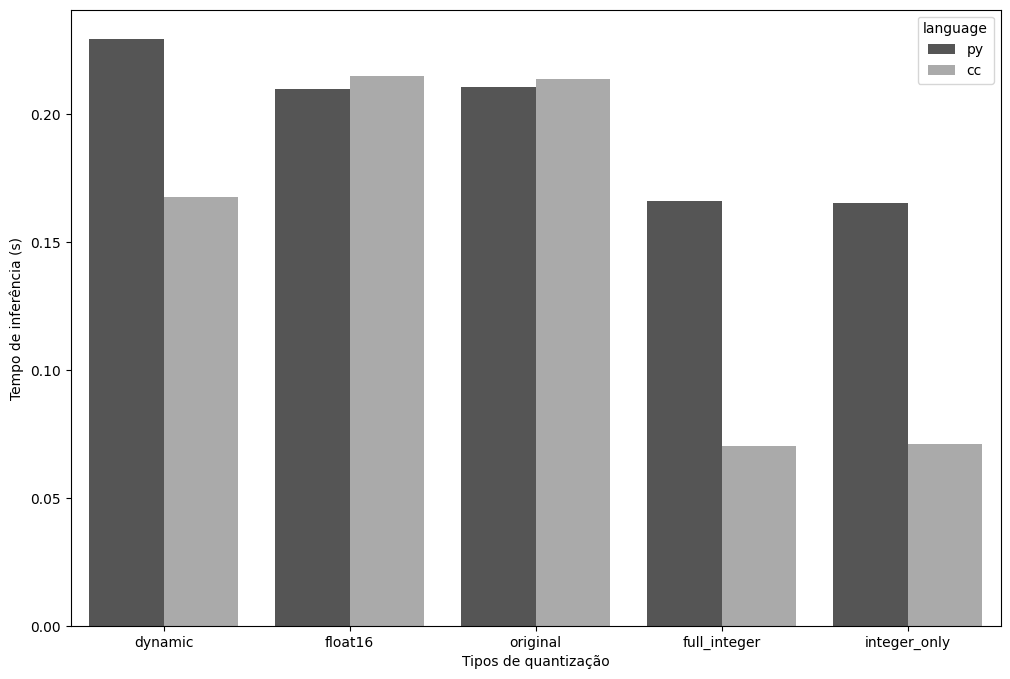

In [61]:
fig = plt.figure(figsize=(12,8))
g1 = sns.barplot(data=df_all.groupby(['modelo', 'language'], as_index=False).agg({'time':'mean'}).sort_values(by=['time'], ascending=False), x='modelo', y='time', palette='binary_r', hue='language')
g1.set_xlabel('Tipos de quantização')
g1.set_ylabel('Tempo de inferência (s)')
# g1.set_title('Gráfico comparativo do tempo de inferência entre Python e C++')
fig.savefig(fname='figuras/comparativo.png', dpi=300);

### Score Python

In [56]:
df_py.groupby(['modelo', 'language']).agg({'score':'median'}).round(4)

,,score
modelo,language,
dynamic,py,0.7246
float16,py,0.7231
full_integer,py,0.7227
integer_only,py,0.5208
original,py,0.7228


In [57]:
df_cc.groupby(['modelo', 'language']).agg({'score':'median'}).round(4)

,,score
modelo,language,
dynamic,cc,0.7238
float16,cc,0.7224
full_integer,cc,0.0664
integer_only,cc,-0.0000
original,cc,0.7228
